<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 29: Sample Means

Associated Textbook Sections: [14.5](https://ccsf-math-108.github.io/textbook/chapters/14/5/Variability_of_the_Sample_Mean.html)

---

## Outline

* [Central Limit Theorem](#Central-Limit-Theorem)
* [Distribution of the Sample Average](#Distribution-of-the-Sample-Average)
* [Center of the Distribution](#Center-of-the-Distribution)
* [Variability of the Sample Average](#Variability-of-the-Sample-Average)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Redefine function from previous lecture
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

# To create normally distributed values
from scipy.stats import norm

---

## Central Limit Theorem

---

### Sample Averages

* The Central Limit Theorem describes how the normal distribution (a bell-shaped curve) is connected to random sample averages.
* We care about sample averages because they estimate population averages.

---

### Central Limit Theorem

> The probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

---

### Demo: Central Limit Theorem

* Load the November 2023 flight delay data in `delay.csv` sourced from the [Bureau of Transportation Statistic's Reporting Carrier On-Time Performance Data](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr). The variable `ARR_DELAY` contains the difference in minutes between scheduled and actual arrival time at the destination airport `DEST`. Early arrivals show negative numbers, and the airline code is expressed in the variable `OP_CARRIER`.
* Demonstrate the Central Limit Theorem by showing how the distribution of sample means changes as the sample size increases.

In [ ]:
sfo = (Table.read_table('delays.csv')
            .where('ORIGIN', 'SFO'))
nan_filter = np.invert(np.isnan(sfo.column('ARR_DELAY')))
sfo = sfo.where(nan_filter)
sfo

FL_DATE,OP_CARRIER,ORIGIN,DEST,ARR_DELAY
11/1/2023 12:00:00 AM,AA,SFO,CLT,-23
11/1/2023 12:00:00 AM,AA,SFO,CLT,-22
11/1/2023 12:00:00 AM,AA,SFO,CLT,-19
11/1/2023 12:00:00 AM,AA,SFO,CLT,-17
11/1/2023 12:00:00 AM,AA,SFO,CLT,-12
11/1/2023 12:00:00 AM,AA,SFO,DFW,-32
11/1/2023 12:00:00 AM,AA,SFO,DFW,-25
11/1/2023 12:00:00 AM,AA,SFO,DFW,-25
11/1/2023 12:00:00 AM,AA,SFO,DFW,-18
11/1/2023 12:00:00 AM,AA,SFO,DFW,-17


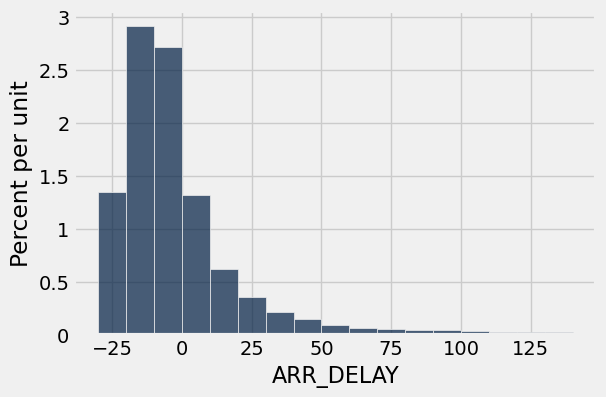

In [ ]:
sfo.hist('ARR_DELAY', bins=np.arange(-30, 150, 10))

In [ ]:
delays = sfo.column('ARR_DELAY')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
(print(f'The average flight delay was {delay_mean: .2f} \
mins with a standard deviation of {delay_sd:.2f} mins.'))

The average flight delay was -0.69 mins with a standard deviation of 45.65 mins.


In [ ]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = sfo.sample(sample_size)
    sampled_delays = sampled_flights.column('ARR_DELAY')
    mean_delay = np.mean(sampled_delays)
    return mean_delay

In [ ]:
one_sample_mean(100)

-2.5

In [ ]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10_000):
        one_mean = one_sample_mean(sample_size)
        means = np.append(means, one_mean)
    return means

Population Average: -0.690824289174


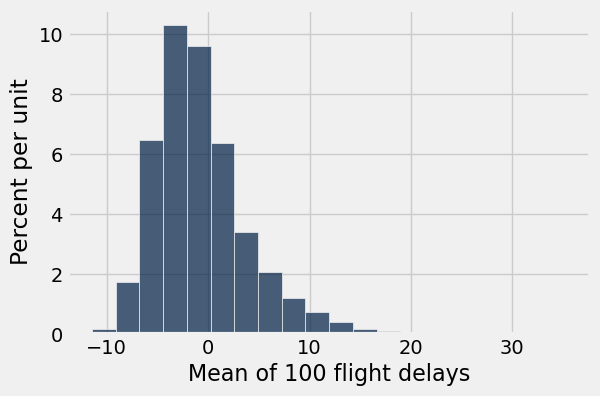

In [ ]:
sample_means_100 = ten_thousand_sample_means(100)
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)
print('Population Average:', delay_mean)

Population Average: -0.690824289174


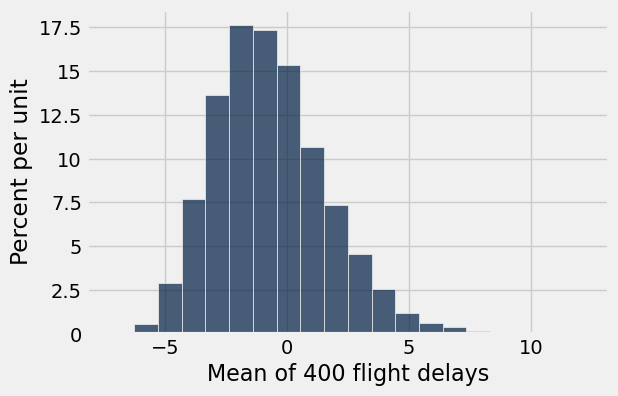

In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

Population Average: -0.690824289174


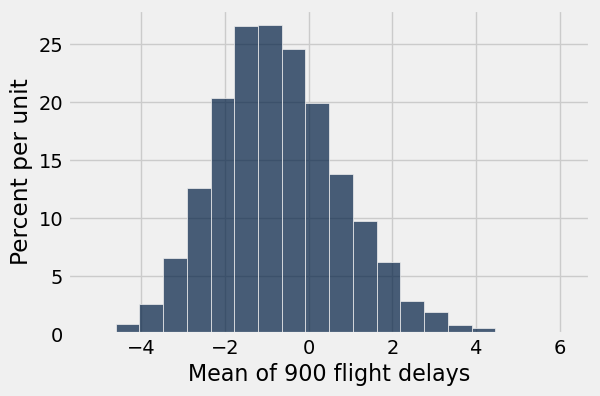

In [ ]:
sample_means_900 = ten_thousand_sample_means(900)
Table().with_column('Mean of 900 flight delays', sample_means_900).hist(bins=20)
print('Population Average:', delay_mean)

---

## Distribution of the Sample Average

---

### Why is There a Distribution?

* You have only one random sample, and it has only one average.
* But the sample could have come out differently.
* And then the sample average might have been different.
* So there are many possible sample averages.


In [ ]:
(print(f"There are {sfo.num_rows ** 400:,} possible \
samples of size 400 from this data set."))

There are 78,409,048,532,875,996,082,177,720,591,128,953,131,507,665,763,283,132,851,909,261,505,820,404,888,117,500,462,132,300,155,370,650,812,073,272,617,227,835,314,633,588,404,859,212,230,233,798,091,873,606,982,281,830,883,780,609,656,818,317,304,484,638,664,478,947,313,710,708,409,748,155,652,579,952,702,146,432,397,433,747,144,548,093,572,071,465,903,126,556,069,325,249,856,200,604,143,480,337,399,942,882,191,421,813,446,593,576,709,442,188,244,165,566,456,258,805,098,359,584,090,571,104,577,276,398,142,527,532,174,686,406,759,820,978,869,324,308,614,802,766,741,734,856,488,055,199,641,117,807,934,321,571,915,138,776,902,420,295,344,328,204,695,569,069,593,148,787,380,232,658,722,890,088,284,657,608,377,926,876,862,168,460,996,326,068,076,925,361,707,229,927,968,612,649,493,165,498,127,782,267,830,470,735,740,721,334,702,155,265,680,978,363,185,895,423,715,173,527,611,606,045,445,141,881,309,755,365,945,110,341,100,553,797,051,520,839,120,194,103,171,335,337,545,867,826,755,092

---

### Distribution of the Sample Average

* Imagine all possible random samples of the same size as yours. There are lots of them.
* Each of these samples has an average.
* The distribution of the sample average is the distribution of the averages of all the possible samples.

---

### Demo: Distribution of the Sample Average

Compare the distribution of sample averages for a few different sample sizes.

In [ ]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900)

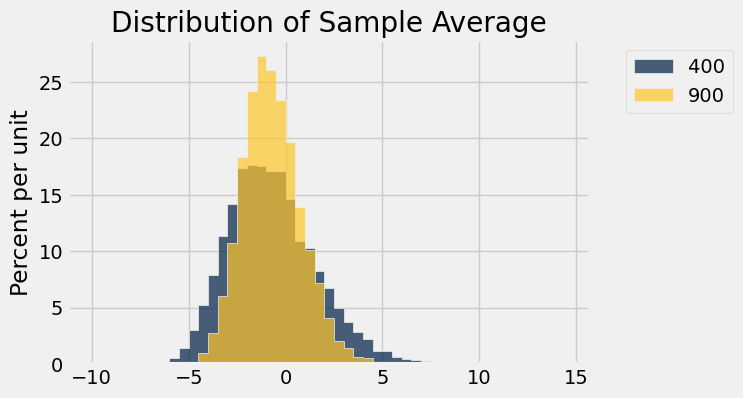

In [ ]:
means_tbl.hist(bins = np.arange(-10, 15, 0.5))
plt.title('Distribution of Sample Average')
plt.show()

---

### Specifying the Distribution

* Suppose the random sample is large.
    * We have seen that the distribution of the sample average is roughly bell shaped.
* Important questions remain:
    * Where is the center of that bell curve?
    * How wide is that bell curve?

---

## Center of the Distribution

---

###  The Population Average

The distribution of the sample average is roughly a bell curve centered at the population average.

---

## Variability of the Sample Average

---

### Why Is This Important?

* Along with the center, the spread helps identify exactly which normal curve is the distribution of the sample average.
* The variability of the sample average helps us measure how accurate the sample average is as an estimate of the population average.
* If we want a specified level of accuracy, understanding the variability of the sample average helps us work out how large our sample has to be.

---

### Two Histogram

<img src="./dist_sample_ave_update.png" width = 50%>

* The gold histogram shows the distribution of 10,000 values, each of which is an average of 900 randomly sampled flight delays.
* The blue histogram shows the distribution of 10,000 values, each of which is an average of 400 randomly sampled flight delays.
* Both are roughly bell shaped.
* The larger the sample size, the narrower the bell.

---

### Demo: The Influence of Sample Size

Re-display the population mean and standard deviation.

In [ ]:
(print(f'The average flight delay was {delay_mean: .2f} \
mins with a standard deviation of {delay_sd:.2f} mins.'))

The average flight delay was -0.69 mins with a standard deviation of 45.65 mins.


* Notice how the sample size impacts the distribution of sample averages.
* Additionally, notice how the ratio of the population SD to the sample SD is approximately equal to the square root of the sample size.

In [ ]:
def plot_and_summarize_sample_means(sample_size):
    """Empirical distribution of random sample means"""
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    sample_mean = np.mean(sample_means)
    sample_sd = np.std(sample_means)

    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", sample_mean)
    print("Population SD:", delay_sd)
    print("SD of sample means:", sample_sd)
    print("Ratio of population SD to sample SD:", delay_sd / sample_sd)
    print("Square Root of the sample size:", np.sqrt(sample_size))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))

    # Overlay a curve representing the normal distribution
    from scipy.stats import norm
    x = np.linspace(np.min(sample_means), np.max(sample_means), 100)
    y = norm.pdf(x, delay_mean, delay_sd/np.sqrt(sample_size))
    plt.plot(x, y, linestyle='--', lw=5, label='Normal Distribution')

    # Add a vertical dashed line showing the mean delay
    plt.axvline(x=delay_mean, color='black', linestyle='--', lw=2, label='Population Mean')
    plt.legend()

Sample size:  100
Population mean: -0.690824289174
Average of sample means:  -0.651513
Population SD: 45.648099308
SD of sample means: 4.56947203962
Ratio of population SD to sample SD: 9.98979727028
Square Root of the sample size: 10.0


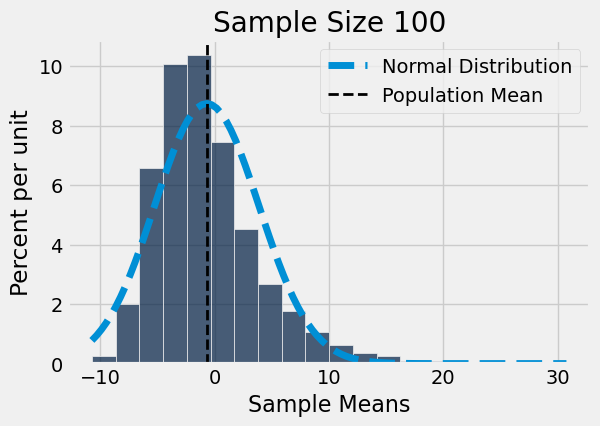

In [ ]:
plot_and_summarize_sample_means(100)

Sample size:  400
Population mean: -0.690824289174
Average of sample means:  -0.68029075
Population SD: 45.648099308
SD of sample means: 2.30886955778
Ratio of population SD to sample SD: 19.7707571457
Square Root of the sample size: 20.0


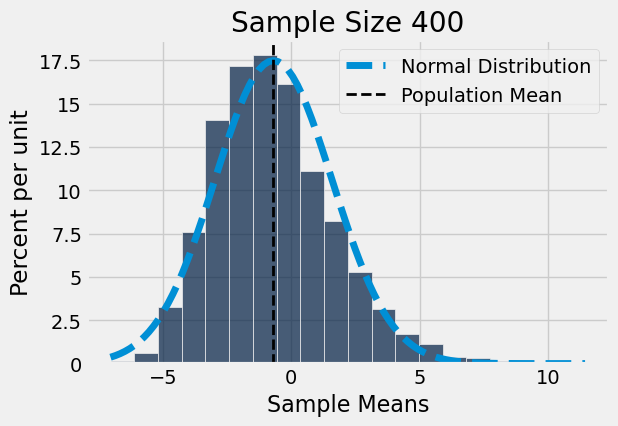

In [ ]:
plot_and_summarize_sample_means(400)

Sample size:  625
Population mean: -0.690824289174
Average of sample means:  -0.68545888
Population SD: 45.648099308
SD of sample means: 1.82520084949
Ratio of population SD to sample SD: 25.0099047021
Square Root of the sample size: 25.0


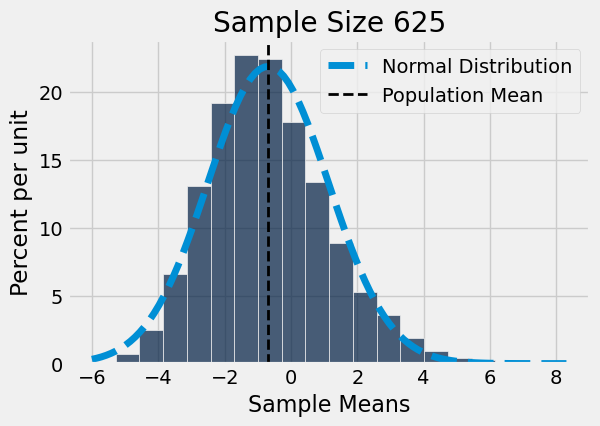

In [ ]:
plot_and_summarize_sample_means(625)

---

### Probability of Sample Average

* The distribution of all possible sample averages of a given size is called the distribution of the sample average.
* We approximate the distribution of sample averages by an empirical distribution.

---

### The Central Limit Theorem

* If
    * the sample is large and
    * drawn at random with replacement,
* Then, regardless of the distribution of the population, the probability distribution of the sample average:
    * is roughly normal
    * mean = population mean
    * SD = (population SD) / the square root of the sample size
    
_Note: For this [theory](https://en.wikipedia.org/wiki/Central_limit_theorem), the results are more reliable when the data has been standardized._

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>